Sources:

https://www.itl.nist.gov/div898/handbook/ppc/section5/ppc52.htm

https://www.itl.nist.gov/div898/handbook/pmc/section1/pmc16.htm

https://support.minitab.com/en-us/minitab/19/help-and-how-to/quality-and-process-improvement/capability-analysis/how-to/capability-analysis/normal-capability-analysis/methods-and-formulas/overall-capability/#cpm

## Preparation

In [1]:
import os
os.chdir("..")
os.getcwd()

'C:\\Users\\An PC\\jupyter\\eda'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

from utils import datasets
from utils import calculations
from utils.plotting import show_and_save_plot
from plots import (run_sequence_plot, histogram, lag_plot, probability_plot, qq_plot,
                   block_plot, box_plot)

---

# Machine Screw Case Study
This case study analyzes three automatic screw machines with the intent of replacing one of them.

The case study is broken down into the following steps.

1. [Background and Data](#background)
2. [Box Plots by Factor](#box_plots)
3. [Analysis of Variance](#anova)
4. [Throughput](#throughput)
5. [Final Conclusions](#conclusions)
    
---

## <a name="background"></a>Background and Data
### Introduction
A machine shop has three automatic screw machines that produce various parts. The shop has enough capital to replace one of the machines. The quality control department has been asked to conduct a study and make a recommendation as to which machine should be replaced. It was decided to monitor one of the most commonly produced parts (an 1/8th inch diameter pin) on each of the machines and see which machine is the least stable.

### Goal
The goal of this study is to determine which machine is least stable in manufacturing a steel pin with a diameter of 0.125 $\pm$ 0.003 inches. Stability will be measured in terms of a constant variance about a constant mean. If all machines are stable, the decision will be based on process variability and throughput. Namely, the machine with the highest variability and lowest throughput will be selected for replacement.

### Data source
https://www.itl.nist.gov/div898/handbook/datasets/MACHINE.DAT

### Process Model
The process model for this operation is trivial and need not be addressed.

### Sensitivity Model
The sensitivity model, however, is important and is given in the figure below. The material is not very important. All machines will receive barstock from the same source and the coolant will be the same. The method is important. Each machine is slightly different and the operator must make adjustments to the speed (how fast the part rotates), feed (how quickly the cut is made) and stops (where cuts are finished) for each machine. The same operator will be running all three machines simultaneously. Measurement is not too important. An experienced QC engineer will be collecting the samples and making the measurements. Finally, the machine condition is really what this study is all about. The wear on the ways and the lead screws will largely determine the stability of the machining process. Also, tool wear is important. The same type of tool inserts will be used on all three machines. The tool insert wear will be monitored by the operator and they will be changed as needed.

![](https://www.itl.nist.gov/div898/handbook/ppc/section5/Machine/gifs/machine.gif)

### Sampling Plan
Given our goal statement and process modeling, we can now define a sampling plan. The primary goal is to determine if the process is stable and to compare the variances of the three machines. We also need to monitor throughput so that we can compare the productivity of the three machines.

There is an upcoming three-day run of the particular part of interest, so this study will be conducted on that run. There is a suspected time-of-day effect that we must account for. It is sometimes the case that the machines do not perform as well in the morning, when they are first started up, as they do later in the day. To account for this we will sample parts in the morning and in the afternoon. So as not to impact other QC operations too severely, it was decided to sample 10 parts, twice a day, for three days from each of the three machines. Daily throughput will be recorded as well.

We are expecting readings around 0.125 $\pm$ 0.003 inches. The parts will be measured using a standard micrometer with readings recorded to 0.0001 of an inch. Throughput will be measured by reading the part counters on the machines at the end of each day. 

### Data
The following are the data that were collected for this study.

```
This is the Dataplot data file        MACHINE.DAT
Data provided by Barry Hembre of AMD.  This data set is analyzed
as a case study in the "Production Process Characterization"
chapter of the NIST/SEMATECH Engineering Statistics Handbook.
The URL for this case study is:

   http://www.itl.nist.gov/div898/handbook/ppc/section5/ppc52.htm

Contact--Barry Hembree, AMD
Number of observations                       = 180
Number of observations per line image        = 5
Order of variables on a line image--
   1. Factor Variable MACHINE      = Machine Number
   2. Factor Variable DAY          = Day
   3. Factor Variable TIME         = 1 = AM, 2 = PM
   4. Factor Variable SAMPLE       = Sample Number
   5. Dependent Variable DIAMETER  = DIAMETER
```

In [5]:
df = datasets.load_screw_machine()
df.head(n=10)

,MACHINE,DAY,TIME,SAMPLE,DIAMETER
0,1,1,1,1,0.1247
1,1,1,1,2,0.1264
2,1,1,1,3,0.1252
3,1,1,1,4,0.1253
4,1,1,1,5,0.1263
5,1,1,1,6,0.1251
6,1,1,1,7,0.1254
7,1,1,1,8,0.1239
8,1,1,1,9,0.1235
9,1,1,1,10,0.1257


---

## <a name="box_plots"></a>Box Plots by Factor
The next part of the analysis is to break down the sources of variation.

### Initial Steps
The initial step is to plot box plots of the measured diameter for each of the explanatory variables.

### Box Plot by Machine
The following is a box plot of the diameter by machine.

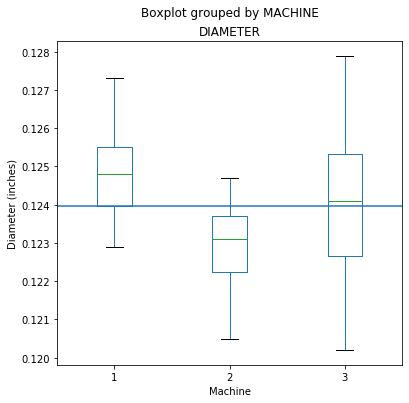

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))

box_plot(df, column="DIAMETER", group="MACHINE", x_label="Machine",
         y_label="Diameter (inches)", ax=ax, show=False, grid=False)

mean = df["DIAMETER"].mean()
ax.axhline(y=mean)

plt.show()

### Conclusions From Box Plot
We can make the following conclusions from this box plot.


1. The location appears to be significantly different for the three machines, with machine 2 having the smallest median diameter and machine 1 having the largest median diameter.


2. Machines 1 and 2 have comparable variability while machine 3 has somewhat larger variability. 

### Box Plot by Day
The following is a box plot of the diameter by day.

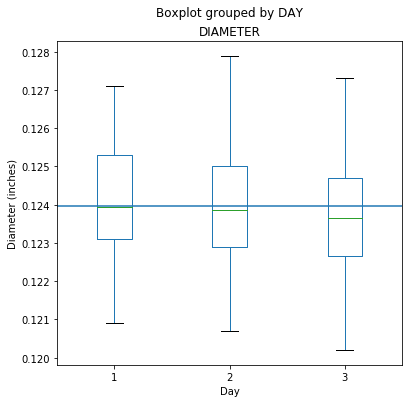

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

box_plot(df, column="DIAMETER", group="DAY", x_label="Day",
         y_label="Diameter (inches)", ax=ax, show=False, grid=False)

mean = df["DIAMETER"].mean()
ax.axhline(y=mean)

plt.show()

### Conclusions From Box Plot
We can draw the following conclusion from this box plot. Neither the location nor the spread seem to differ significantly by day.

### Box Plot by Time of Day
The following is a box plot of the time of day.

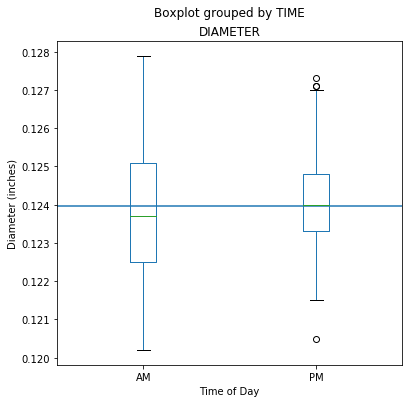

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

box_plot(df, column="DIAMETER", group="TIME", x_label="Time of Day",
         y_label="Diameter (inches)", ax=ax, show=False, grid=False)

mean = df["DIAMETER"].mean()
ax.axhline(y=mean)

ax.set_xticklabels(["AM", "PM"])

plt.show()

### Conclusion From Box Plot
We can draw the following conclusion from this box plot. Neither the location nor the spread seem to differ significantly by time of day.

### Box Plot by Sample Number
The following is a box plot of the sample number.

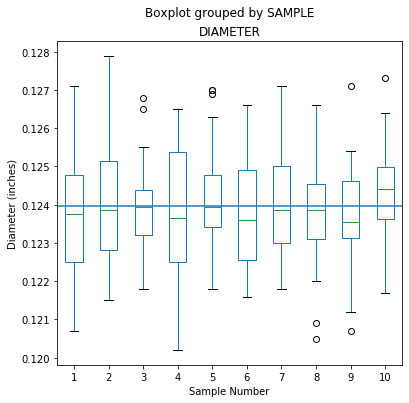

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))

box_plot(df, column="DIAMETER", group="SAMPLE", x_label="Sample Number",
         y_label="Diameter (inches)", ax=ax, show=False, grid=False)

mean = df["DIAMETER"].mean()
ax.axhline(y=mean)

plt.show()

### Conclusion From Box Plot
We can draw the following conclusion from this box plot. Although there are some minor differences in location and spread between the samples, these differences do not show a noticeable pattern and do not seem significant.

---

## <a name="anova"></a>Analysis of Variance
### Analysis of Variance Using All Factors
We can confirm our interpretation of the box plots by running an analysis of variance when all four factors are included.

```
 Source            DF    Sum of       Mean   F Statistic   Prob > F
                        Squares     Square                   
 ------------------------------------------------------------------
 Machine            2  0.000111   0.000055       29.3159    1.3e-11
 Day                2  0.000004   0.000002        0.9884       0.37
 Time               1  0.000002   0.000002        1.2478       0.27
 Sample             9  0.000009   0.000001        0.5205       0.86
 Residual         165  0.000312   0.000002
 ------------------------------------------------------------------
 Corrected Total  179  0.000437   0.000002
 ```
 
__Since there is still no Python module for multi-way ANOVA without considering interactions, here we will be using the Linear Regression Model instead.__

In [14]:
import statsmodels.formula.api as smf

In [24]:
model = smf.ols(formula="DIAMETER ~ MACHINE + DAY + TIME + SAMPLE", data=df)
ols_results = model.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DIAMETER   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.076
Date:                Thu, 03 Oct 2019   Prob (F-statistic):             0.0177
Time:                        18:57:01   Log-Likelihood:                 914.20
No. Observations:                 180   AIC:                            -1818.
Df Residuals:                     175   BIC:                            -1802.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1247      0.001    216.103      0.000       0.124       0.126
MACHINE       -0.0004      0.000     -3.100      0.002      -0.001      -0.000
DAY           -0.0002      0.000     -1.189      0.236      -0.000       0.000
TIME           0.0002      0.000      1.005      0.316      -0.000       0.001
SAMPLE      2.054e-05   3.97e-05      0.518      0.605   -5.77e-05    9.88e-05
==============================================================================
Omnibus:                        4.492   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                4.480
Skew:                           0.384   Prob(JB):                        0.106
Kurtosis:                       2.920   Cond. No.                         36.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
anova_results = sm.stats.anova_lm(ols_results, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
MACHINE,2.244675e-05,1.0,9.612700,0.002253
DAY,3.300083e-06,1.0,1.413243,0.236129
TIME,2.357556e-06,1.0,1.009610,0.316383
SAMPLE,6.264310e-07,1.0,0.268266,0.605152
Residual,4.086450e-04,175.0,NaN,NaN


### Interpretation of ANOVA Output
We fit the model

$$Y_{ijklm}=\mu+\alpha i+\beta j+\tau k+\phi l+\epsilon_{ijklm}$$

which has an overall mean, as opposed to the model

$$Y_{ijklm}=A_i+B_j+C_k+D_l+\epsilon_{ijklm}.$$

These models are mathematically equivalent. The effect estimates in the first model are relative to the overall mean. The effect estimates for the second model can be obtained by simply adding the overall mean to effect estimates from the first model.

Only the machine factor is statistically significant. This confirms what the box plots in the previous section had indicated graphically.

### Analysis of Variance Using Only Machine
The previous analysis of variance indicated that only the machine factor was statistically significant. The following table displays the ANOVA results using only the machine factor.

```
 Source            DF    Sum of       Mean   F Statistic   Prob > F
                        Squares     Square                   
 ------------------------------------------------------------------
 Machine            2  0.000111   0.000055       30.0094    6.0E-12
 Residual         177  0.000327   0.000002
 ------------------------------------------------------------------
 Corrected Total  179  0.000437   0.000002
```

In [39]:
!pip install pingouin
import pingouin as pg

  Running setup.py install for pingouin: started
    Running setup.py install for pingouin: finished with status 'done'


In [88]:
aov = pg.anova(data=df, dv="DIAMETER", between="MACHINE", detailed=True)
print(aov)

    Source   SS   DF   MS      F       p-unc    np2
0  MACHINE  0.0    2  0.0  30.01  5.9877e-12  0.253
1   Within  0.0  177  0.0      -           -      -


We can also use Linear Regression model instead of one-way ANOVA.

### Interpretation of ANOVA Output
At this stage, we are interested in the level means for the machine variable.

In [50]:
groups_by_machine = df[["MACHINE", "DIAMETER"]].groupby(by="MACHINE").describe()
groups_by_machine

DIAMETER                                                          \
           count      mean       std     min       25%     50%       75%   
MACHINE                                                                    
1           60.0  0.124887  0.001146  0.1229  0.123975  0.1248  0.125500   
2           60.0  0.122968  0.000924  0.1205  0.122250  0.1231  0.123700   
3           60.0  0.124022  0.001836  0.1202  0.122650  0.1241  0.125325   

                 
            max  
MACHINE          
1        0.1273  
2        0.1247  
3        0.1279

In [68]:
for machine in groups_by_machine.index:
    n = groups_by_machine.loc[machine, ("DIAMETER","count")]
    mean = groups_by_machine.loc[machine, ("DIAMETER","mean")]
    std = groups_by_machine.loc[machine, ("DIAMETER","std")]
    
    # Standard error of the mean
    se = std / np.sqrt(n)
    
    # Confidence interval
    ##ci = stats.t.interval(0.95, n-1, mean, std)
    ci = stats.norm.interval(0.95, mean, std)
    
    print("Machine={} | Mean={:.5f} | SE={:.5f} | Confidence Interval=({:.5f}, {:.5f})".format(
                machine, mean, se, *ci))

Machine=1 | Mean=0.12489 | SE=0.00015 | Confidence Interval=(0.12264, 0.12713)
Machine=2 | Mean=0.12297 | SE=0.00012 | Confidence Interval=(0.12116, 0.12478)
Machine=3 | Mean=0.12402 | SE=0.00024 | Confidence Interval=(0.12042, 0.12762)


### Model Validation
As a final step, we [validate the model](https://www.itl.nist.gov/div898/handbook/pmd/section4/pmd44.htm) by generating a [4-plot](https://www.itl.nist.gov/div898/handbook/eda/section3/4plot.htm) of the residuals.

The following code uses the ANOVA for the Linear Regression model to calculate residuals.

In [86]:
model = smf.ols(formula="DIAMETER ~ MACHINE", data=df)
ols_results = model.fit()
residuals = ols_results.resid

In [77]:
def four_plot(series, main_title="4-PLOT", show=True, save=False,
              run_kws=None, lag_kws=None, hist_kws=None, prob_kws=None):

    fig, axes = plt.subplots(nrows=2, ncols=2,
                             gridspec_kw={
                                 "left": 0.1, "right": 0.98,
                                 "top": 0.9, "bottom": 0.1,
                                 "wspace": 0.3, "hspace": 0.3,
                                 },
                             figsize=(7, 8))
    rsp, lag = axes[0]
    hist, prob = axes[1]
    
    # Run Sequence Plot
    run_kws = run_kws if run_kws is not None else {}
    clearance = (max(series)-min(series)) * 1/10
    y_lim = (min(series)-clearance, max(series)+clearance)
    run_sequence_plot(series, y_lim=y_lim, ax=rsp, show=False, **run_kws)

    # Lag Plot
    lag_kws = lag_kws if lag_kws is not None else {}
    lag_plot(series, ax=lag, show=False, **lag_kws)
    
    # Histogram
    hist_kws = hist_kws if hist_kws is not None else {}
    histogram(series, ax=hist, show=False, **hist_kws)

    # Probability Plot
    prob_kws = prob_kws if prob_kws is not None else {}
    probability_plot(series, ax=prob, show=False, **prob_kws)
    
    fig.suptitle(main_title)
    
    show_and_save_plot(show=show, save=save, filename="4-plot.png")

In [78]:
help(four_plot)

Help on function four_plot in module __main__:

four_plot(series, main_title='4-PLOT', show=True, save=False, run_kws=None, lag_kws=None, hist_kws=None, prob_kws=None)



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


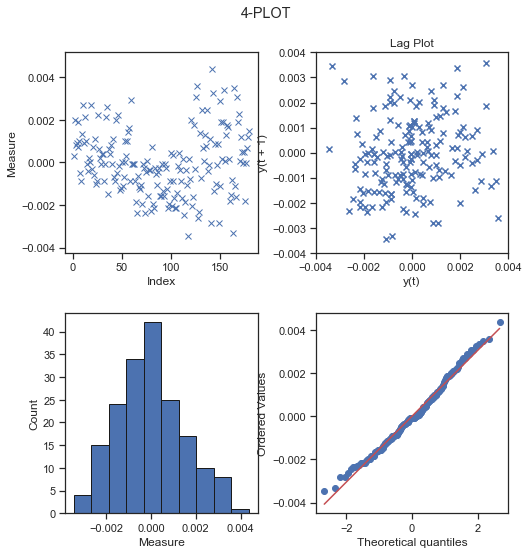

In [83]:
four_plot(residuals, run_kws={"marker": "x", "color": "w", "markeredgecolor": "b"},
          lag_kws={"marker": "x", "x_lim": (-0.004, 0.004), "y_lim": (-0.004, 0.004)})

The 4-plot does not indicate any significant problems with the ANOVA model.

---

## <a name="throughput"></a>Throughput
### Summary of Throughput
The throughput is summarized in the following table (this was part of the original data collection, not the result of analysis).

```
    Machine   Day 1   Day 2   Day 3
       1       576     604     583
       2       657     604     586
       3       510     546     571
```

This table shows that machine 3 had significantly lower throughput.

### Graphical Representation of Throughput
We can show the throughput graphically.

In [90]:
throughput = {"Machine": [1, 2, 3],
              "Day 1": [576, 657, 510],
              "Day 2": [604, 604, 546],
              "Day 3": [583, 586, 571]}
throughput = pd.DataFrame(throughput)
throughput

,Machine,Day 1,Day 2,Day 3
0,1,576,604,583
1,2,657,604,586
2,3,510,546,571


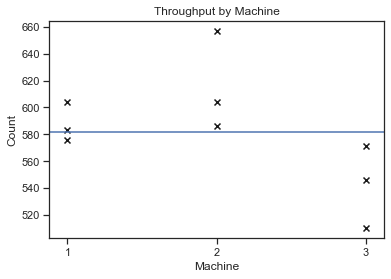

In [107]:
for i in range(1, 4):
    plt.scatter(throughput["Machine"], throughput["Day {}".format(i)], marker="x", c="k")

mean = throughput.iloc[:, 1:].values.ravel().mean()
plt.axhline(y=mean)

plt.xlabel("Machine")
plt.ylabel("Count")
plt.xticks(throughput.index+1)
plt.title("Throughput by Machine")

plt.show()

The graph clearly shows the lower throughput for machine 3.

### Analysis of Variance for Throughput
We can confirm the statistical significance of the lower throughput of machine 3 by running an analysis of variance. 

In [108]:
# PLACEHOLDER

### Interpretation of ANOVA Output
We summarize the level means for machine 3 in the following table. 

In [109]:
# PLACEHOLDER

## <a name="conclusions"></a>Final Conclusions
The analysis shows that machines 1 and 2 had about the same variablity but significantly different locations. The throughput for machine 2 was also higher with greater variability than for machine 1. An interview with the operator revealed that he realized the second machine was not set correctly. However, he did not want to change the settings because he knew a study was being conducted and was afraid he might impact the results by making changes. Machine 3 had significantly more variation and lower throughput. The operator indicated that the machine had to be taken down several times for minor repairs. Given the preceeding analysis results, the team recommended replacing machine 3. 

---